<a href="https://colab.research.google.com/github/adityaSGSITS/Driver-Drowsiness-Detection-System/blob/master/Aditya_P_Wagh_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT-1**

Instructions


1.   If want partial training set, change training_set_size variable.
2.   Make Changes in Testing, as defined there.


**DRIVE MOUNT**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount='True')


Mounted at /content/gdrive


**IMPORT PACKAGES**

In [0]:
import pandas as pd
import numpy as np
from skimage.io import imread 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow import keras
import cv2 

**READ FILE**

In [0]:
data=pd.read_csv('/content/gdrive/My Drive/dress_patterns.csv')
data.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


**DATA EXPLORATION**

In [0]:
print("Length: ",len(data))

#column name
print("Column Names: ",data.columns)

#shape
print("Shape: ",data.shape)


Length:  15702
Column Names:  Index(['_unit_id', 'category', 'category:confidence', 'image_url'], dtype='object')
Shape:  (15702, 4)


**CATEGORIES**

In [0]:
print(data.category.unique())
array=data.category.unique()

['ikat' 'plain' 'polka dot' 'geometry' 'floral' 'squares' 'scales'
 'animal' 'OTHER' 'stripes' 'tribal' 'houndstooth' 'cartoon' 'chevron'
 'stars' 'letter_numb' 'skull']


**LABEL** (category_name to category_label_id): Dictionary

In [0]:
k=0
labels={}
revlabels={}
for i in array:
  labels[i]=k
  revlabels[k]=i
  k=k+1
print(labels)

{'ikat': 0, 'plain': 1, 'polka dot': 2, 'geometry': 3, 'floral': 4, 'squares': 5, 'scales': 6, 'animal': 7, 'OTHER': 8, 'stripes': 9, 'tribal': 10, 'houndstooth': 11, 'cartoon': 12, 'chevron': 13, 'stars': 14, 'letter_numb': 15, 'skull': 16}


**URLLIB TO GET IMAGE**

In [0]:
import urllib
from PIL import Image
def getImage(url):
  img_url= urllib.request.urlopen(url)
  image=Image.open(img_url)
  num_image = np.asarray( img )
  return num_image



** SAMPLE DISPLAY IMAGE** (Using urllib)

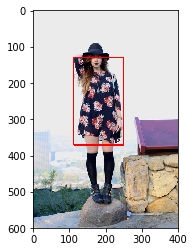

In [0]:
img=plt.imread(data.image_url[8])
# img2=imread(data.image_url[8])
# imshow(img)
imshow(getImage(data.image_url[8]))

**IMAGE TRANSFORM : Crop to Required Region)**

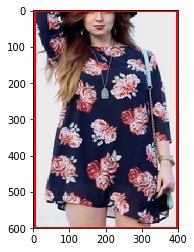

In [0]:
def cropToMargin(image,image2):
#   Getting Region
  hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
  lower = np.array([120, 255, 50])
  upper= np.array([120, 255, 255])
  mask = cv2.inRange(hsv, lower, upper)
#   Getting Contours Arround It
  _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  c = max(contours, key=cv2.contourArea)
  extLeft = tuple(c[c[:, :, 0].argmin()][0])
  extRight = tuple(c[c[:, :, 0].argmax()][0])
# end point of given region
  l=extLeft[0]
  r=extRight[0]
  t=extLeft[1]
  b=extRight[1]

  src_coor = np.float32([[l,t],[r,t],[l,b],[r,b]])
  w=r-l
  h=b-t
  des_coor=np.float32([[0,0],[w,0],[0,h],[w,h]])
  PT = cv2.getPerspectiveTransform(src_coor,des_coor)
  cropped= cv2.warpPerspective(image,PT,(w,h))
  
  width = 400
  height = 600
  dim = (width, height)
  resized = cv2.resize(cropped, dim, interpolation = cv2.INTER_AREA)
  return resized




sample=cropToMargin(img,img2)
imshow(sample)
    

**TRAINING SETS**

**url -> images**
1.   training set: images
2.  target: category




In [0]:
training_set_size=len(data)
# training_set_size=5

In [0]:
images=[]

cat=[]
# data_length
for i in range(training_set_size):
#     read image
    cur=plt.imread(data.image_url[i])
    cur_io=imread(data.image_url[i])
#     crop image
    trans=cropToMargin(cur,cur_io)/255.0
#   append to array
    images.append(trans)
#   category array
    cat.append(labels.get(data.category[i]))

In [0]:
# Array To Numpy Array

ncat=np.asarray(cat)
nimages=np.asarray(images)
    

print(ncat)

[0 1 2 1 3]


**Training data exploration**

In [0]:
nimages[0].shape


(600, 400, 3)

**MODEL**

In [0]:
no_of_targets=len(labels)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(nimages[0].shape)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(no_of_targets, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(nimages,ncat,epochs=5)

Epoch 1/5
5/5 [==============================] - 2s 330ms/sample - loss: 2.8315 - acc: 0.2000
Epoch 2/5
5/5 [==============================] - 2s 315ms/sample - loss: 2.6630 - acc: 0.4000
Epoch 3/5
5/5 [==============================] - 1s 222ms/sample - loss: 0.9503 - acc: 0.4000
Epoch 4/5
5/5 [==============================] - 1s 223ms/sample - loss: 1.0909 - acc: 0.6000
Epoch 5/5
5/5 [==============================] - 1s 222ms/sample - loss: 0.8846 - acc: 0.6000


**ACCURACY**

In [0]:
test_loss, test_acc = model.evaluate(nimages, ncat)

print('Test accuracy:', test_acc)


5/5 [==============================] - 0s 23ms/sample - loss: 0.2117 - acc: 1.0000
Test accuracy: 1.0


**TESTING**

1. nimages should be replace by test_images numpy array.
2. prediction will be done for all images in array.
3. m is image number whose prediction is to check.


By default Training Set is taken as Testing Set.
And m=0


In [0]:
predictions = model.predict(nimages)
print(ncat)
m=0#ITEM NO
print(predictions[m])
label_no=np.argmax(predictions[m])
label_name=revlabels.get(label_no)
print(label_name)

[0 1 2 1 3]
[8.6806369e-01 6.8005912e-02 2.4281358e-02 3.6044952e-02 1.6511786e-04
 6.7117537e-05 1.3688373e-04 1.2372524e-04 2.5689636e-05 4.5335415e-05
 9.3394854e-05 5.1384002e-05 4.8082499e-04 1.9096043e-04 5.4118637e-04
 1.0318188e-04 1.5793085e-03]
ikat


**SIMILAR PRODUCTS**

In [0]:
simProd=data[data.category==label_name]['image_url']
simProd.head()




0      http://s3-eu-west-1.amazonaws.com/we-attribute...
14     http://s3-eu-west-1.amazonaws.com/we-attribute...
87     http://s3-eu-west-1.amazonaws.com/we-attribute...
94     http://s3-eu-west-1.amazonaws.com/we-attribute...
166    http://s3-eu-west-1.amazonaws.com/we-attribute...
Name: image_url, dtype: object

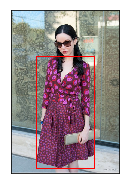

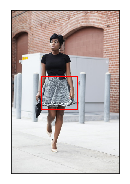

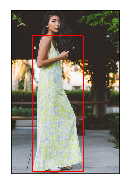

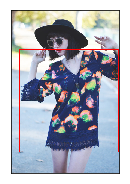

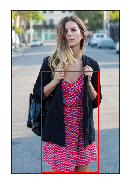

In [0]:
count=1
for i in simProd:
    plt.figure(figsize=(3,3))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)    
    timg = imread(i)
    plt.imshow(timg,cmap=plt.cm.binary)  
    plt.show()
    count=count+1
    if(count>5):
        break